<a href="https://colab.research.google.com/github/jdsmithwes/Telco-Data-Churn/blob/master/Module3_project_master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Telco Churn Project
Jamaal Smith 





## Busines Case Intro

This analysis will seek to examine whether or not one can predict a customer's decision to remain with a phone company or leave the company. This analysis is important to businesses that must allocate resources to maximize their revenue. Additionally, besides losing paying customers in the near term, companies often have to spend more money to attract new customers than they spend retaining existing customers. 

While there are many factors and data points that can be collected on customers, the primary goal of this analysis is to identify the handful of feature variables that a company can monitor to take preventive measures to mitigate customer churn.

### Additional Context (From Context)

Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

Companies usually make a distinction between voluntary churn and involuntary churn. Voluntary churn occurs due to a decision by the customer to switch to another company or service provider, involuntary churn occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. In most applications, involuntary reasons for churn are excluded from the analytical models. Analysts tend to concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance

## Data Analysis

### First Impressions of Data

In [51]:
#import the data
df = pd.read_csv('churn_data.csv')
from scrubbing import info
#from scrubbing import null
info(df)

The dataframe has a shape of:

 (3333, 21)
The dataframe has the following datatypes:

 state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object
The total number of each datatype is:


 int64      8
float64    8
object     4
bool       1
dtype: int64


state  account length  ...  customer service calls  churn
0    KS             128  ...                       1  False
1    OH             107  ...                       1  False
2    NJ             137  ...                       0  False
3    OH              84  ...                       2  False
4    OK              75  ...                       3  False

[5 rows x 21 columns]

In [52]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Based on initial review of the data, we can conclude that the dataset is comprised of 21 columns and 3333 rows. Further, there are no null values in the data set.

The next step in preparing the data for the model is to convert the object type in the phone number, international plan, and voicemail plan columns for the machine learning model.

For now, I will only focus on the international and voicemail plan columns. I made this decision because the phone number a person is assigned plays no role in whether or not a person keeps their service.

### Phone Number & State Column Treatment

In [4]:
#phone number alone cannot forecast whether someone churns or not
df = df.drop('phone number',axis=1)

In [26]:
df.groupby(by='state',axis=0).sum().head(5)

account length  area code  ...  customer service calls  churn
state                             ...                               
AK               5054      22812  ...                      81    3.0
AL               7842      34450  ...                     125    8.0
AR               5334      24159  ...                     109   11.0
AZ               6430      27690  ...                     102    4.0
CA               3374      15011  ...                      50    9.0

[5 rows x 17 columns]

The phone number column can be excluded from the data set. However, when examing churn on a state-by-state basis, there is enough variance in these figures to suggest that state could be a feature variable that might be worth considering for inclusion in the model.

### EDA

Text(0.5, 1.0, 'Frequency of Churn')

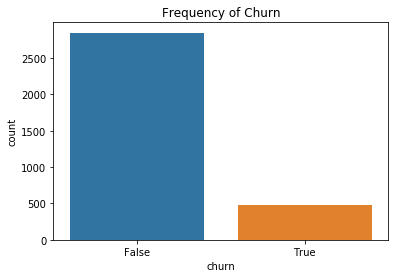

In [49]:
#Frequency of Churn Phenomenon
sns.countplot(x='churn',data=df)
plt.title('Frequency of Churn')

In [50]:
a = (df['churn'].sum())
b = (len(df['churn']))
percent_churn = a/b
percent_remain = 1-percent_churn

print('The percentage of Churn in dataset is:', percent_churn*100)
print('The percentage of remaining in dataset is:', percent_remain*100)

The percentage of Churn in dataset is: 14.491449144914492
The percentage of remaining in dataset is: 85.5085508550855


#### Feature Variable Examination

Because the churn variable is categorical, many visual tools will be limited and not fruitful. As a proxy, comparisons of feature variables against the account length column might be useful. It is worth examining whether certain behaviors by customers result in longer account lengths.

In [70]:
#for visualization below
df.columns

243

In [ ]:
fig,ax = plt.subplots(2,7)
fig = plt.figure(figsize=(14,4))
features = ['number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls',]
for i in range(2):
    for j in range(7):
        for feature in features:
            ax[i,j] = sns.jointplot(feature,'account length',data=df,kind='reg')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/axisgrid.py:1675: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


### Categorical Variable Encoding



In [5]:

df_encode=df.drop('churn',axis =1)


category = [key for key in dict(df_encode.dtypes) if dict(df_encode.dtypes)[key] in ['bool','object']]

LE = LabelEncoder()
for i in category:
    LE.fit(df[i])
    df_encode[i] = LE.transform(df_encode[i])
df_encode.head(5)

account length  area code  international plan  voice mail plan  \
0             128        415                   0                1   
1             107        415                   0                1   
2             137        415                   0                0   
3              84        408                   1                0   
4              75        415                   1                0   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  
0                       1  
1                       1  
2                       0  
3                       2  
4                       3

As noted before, since it is hard to argue that a given phone number has any relation to churn rate, this column will be eliminated now as part of the feature selection process.

## Data Distribution Visualization

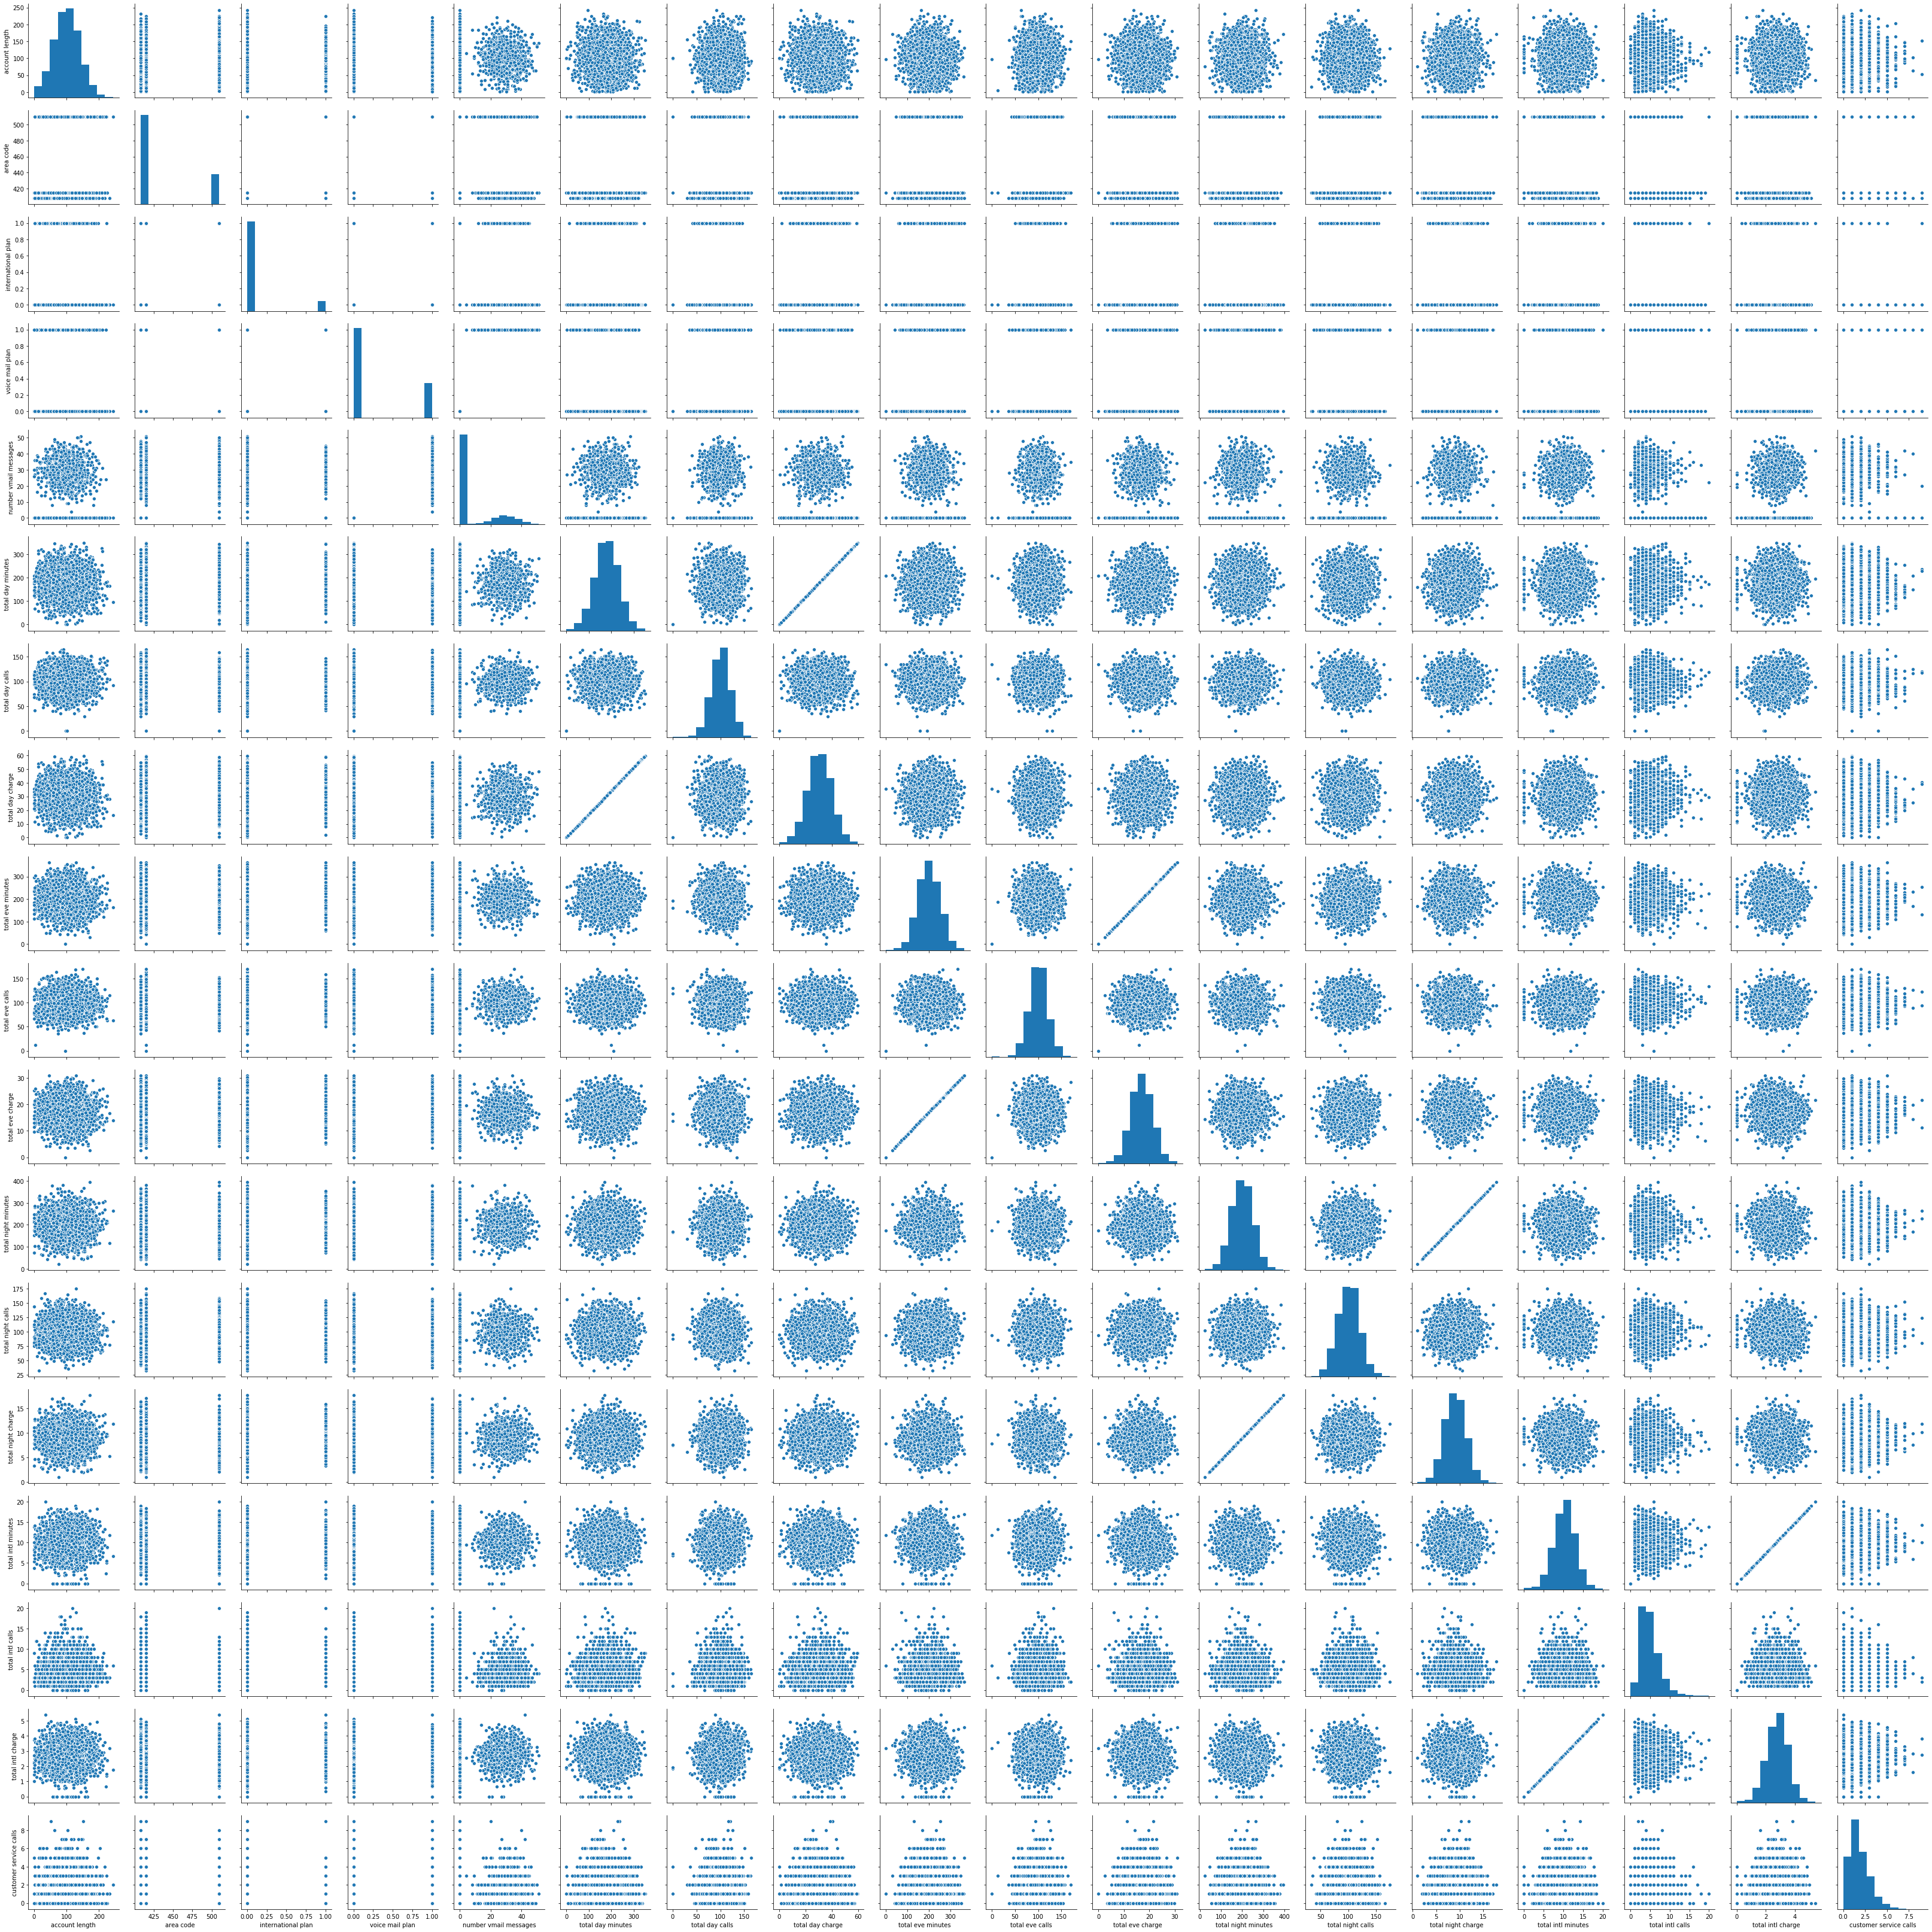

In [6]:
#cursory review of data distributions and check for any categorical variables

data = df_encode
sns.pairplot(data)
plt.show()

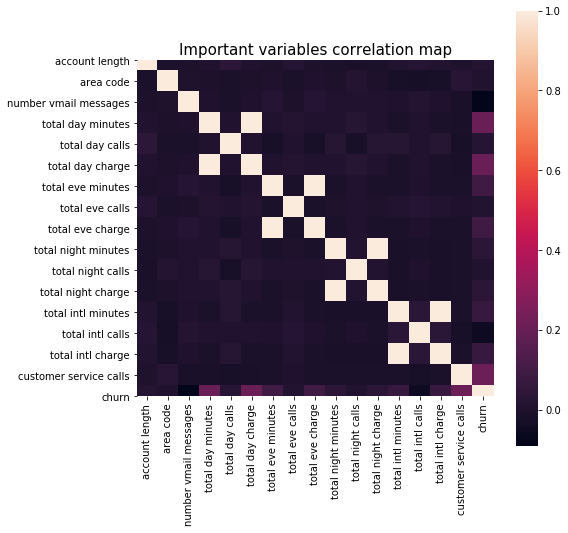

In [7]:
#heatmap to determine whether any multicollinearity exists in data
corrmat = df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

Based on the heatmap, any correlations that exist in dataset make sense as they are related items. For instance, international call charges move in tandem with minutes of international calls

##Assigning the independent and dependent variabls

In [8]:
y = df['churn']
X = df_encode

The pairplot graph highlights that all of the non-boolean dataframes are somewhat normally distributed. To optimize later model performance, data will be standardized and outliers treated. Again, the above visualization suggests that the data should only endure minor adjustments.

Of all the datasets, the number of voicemail data appears to have lots of 0s in its distribution.

For now, the states column will be left in the dataset and later feature selection measures will provide a statistically significant method for determining whether or not this explanatory variable will be included in the final model.

### Splitting Data into Training and Test Data Sets

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0, stratify= y)

In [11]:
X_train = pd.DataFrame(X_train,columns =X.columns)
X_test = pd.DataFrame(X_test,columns =X.columns)

X_test

account length  area code  international plan  voice mail plan  \
403              119        510                   0                0   
432              112        510                   0                0   
879              122        510                   0                1   
1796              79        415                   0                0   
229               45        415                   0                1   
...              ...        ...                 ...              ...   
190              107        415                   0                0   
2484             141        415                   0                1   
2272              74        510                   0                0   
343               98        408                   0                1   
3283              99        510                   0                0   

      number vmail messages  total day minutes  total day calls  \
403                       0              222.8              122   
432                       0              243.4               77   
879                      33              270.8               96   
1796                      0              144.0               90   
229                      22              196.6               84   
...                     ...                ...              ...   
190                       0              133.8               85   
2484                     39              116.9              127   
2272                      0              124.0              102   
343                      21               64.6               98   
3283                      0              238.4               96   

      total day charge  total eve minutes  total eve calls  total eve charge  \
403              37.88              163.2              107             13.87   
432              41.38              182.1               97             15.48   
879              46.04              220.4              110             18.73   
1796             24.48              135.8               91             11.54   
229              33.42              313.2               92             26.62   
...                ...                ...              ...               ...   
190              22.75              180.5               94             15.34   
2484             19.87              276.5               88             23.50   
2272             21.08              262.1              101             22.28   
343              10.98              176.1               86             14.97   
3283             40.53              246.5              130             20.95   

      total night minutes  total night calls  total night charge  \
403                 160.6                112                7.23   
432                 259.2                 94               11.66   
879                 169.9                104                7.65   
1796                212.4                129                9.56   
229                 163.3                108                7.35   
...                   ...                ...                 ...   
190                 112.2                115                5.05   
2484                289.9                125               13.05   
2272                268.2                 98               12.07   
343                 244.8                 84               11.02   
3283                198.4                117                8.93   

      total intl minutes  total intl calls  total intl charge  \
403                 11.2                 6               3.02   
432                 12.8                 2               3.46   
879                 11.8                 8               3.19   
1796                13.0                 4               3.51   
229                 11.9                 3               3.21   
...                  ...               ...                ...   
190                  8.9                 4               2.40   
2484                12.3              

### Feature Scaling

In [12]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Machine Learning Models

### XGBoost Classifier

In [13]:
# train the model

model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [14]:
#predict
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print( "The model's accuracy is",accuracy)

The model's accuracy is 0.964


In [15]:
#%conda install graphviz

In [17]:
#decision tree
#fig, ax = plt.subplots(figsize=(30, 30))
#plot_tree(model, num_trees=0, rankdir='LR',ax=ax)
#plt.show()

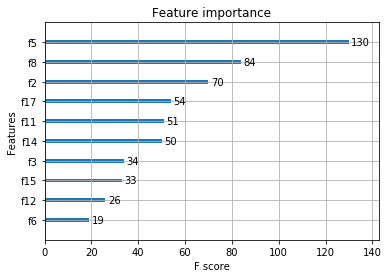

In [18]:
#feature importance
plot_importance(model,max_num_features=10)
plt.show()

In [19]:
df_encode.columns

Index(['account length', 'area code', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls'],
      dtype='object')

The Accuracy Score for this model is 0.964


Text(0.5, 1, 'Confusion Matrix')

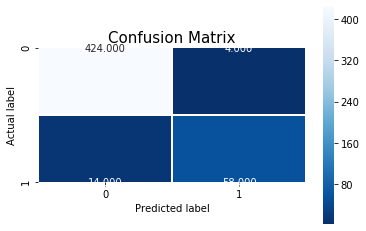

In [20]:

cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
print('The Accuracy Score for this model is {acc}'.format(acc=acc))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title('Confusion Matrix', size = 15)

##Support Vector Machine Classification

In [21]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 42,)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [22]:
y_predSVM = classifier.predict(X_test)

The Accuracy Score for this model is 0.856


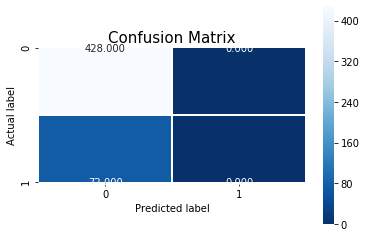

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_predSVM)
acc = accuracy_score(y_test,y_predSVM)
print('The Accuracy Score for this model is {acc}'.format(acc=acc))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title('Confusion Matrix', size = 15);


###SVM Classification Report

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predSVM))

              precision    recall  f1-score   support

       False       0.86      1.00      0.92       428
        True       0.00      0.00      0.00        72

    accuracy                           0.86       500
   macro avg       0.43      0.50      0.46       500
weighted avg       0.73      0.86      0.79       500



/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
SVM_all = [classifier.__class__,accuracy_score(y_test,y_predSVM),roc_auc_score(y_test,y_predSVM)]
results = pd.DataFrame([SVM_all])

###Feature Importance

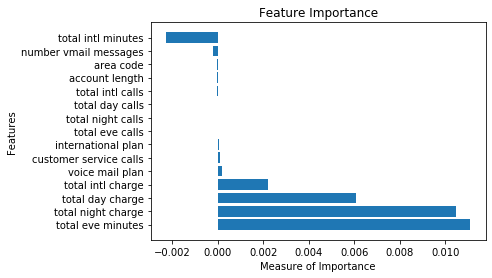

In [27]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.ylabel('Features')
    plt.xlabel('Measure of Importance')
    plt.title('Feature Importance')
    plt.show()

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances((classifier.coef_[0]), list(df_encode.columns), top=15)


##SVM with limited features

###Assigning data variables, splitting data, running model

In [28]:
X = df.iloc[:,[9,14,8,17]].values
y = df.iloc[:,-1].values

In [29]:
from sklearn.model_selection import train_test_split
X_trainfew, X_testfew, y_trainfew, y_testfew = train_test_split(X, y, test_size = 0.15, random_state = 0, stratify= y)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_trainfew = sc.fit_transform(X_trainfew)
X_testfew = sc.transform(X_testfew)

In [31]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0,)
classifier.fit(X_trainfew, y_trainfew)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [32]:
y_predSVMfew = classifier.predict(X_testfew)

### Model Performance of SVM with Limited Features

The Accuracy Score for this model is 0.868


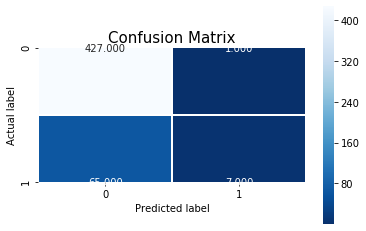

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_testfew,y_predSVMfew)
acc = accuracy_score(y_testfew,y_predSVMfew)
print('The Accuracy Score for this model is {acc}'.format(acc=acc))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title('Confusion Matrix', size = 15);

###Support Vector Machine with Limited Feature Elimination Classification Report

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_testfew,y_predSVMfew))

              precision    recall  f1-score   support

       False       0.87      1.00      0.93       428
        True       0.88      0.10      0.18        72

    accuracy                           0.87       500
   macro avg       0.87      0.55      0.55       500
weighted avg       0.87      0.87      0.82       500



In [35]:
SVM_limited = [classifier.__class__,accuracy_score(y_testfew,y_predSVMfew),roc_auc_score(y_testfew,y_predSVMfew)]
results = results.append([SVM_limited])

###Support Vector Machine with Two Features

In [36]:
X = df.iloc[:,[9,14]].values
y = df.iloc[:,-1].values

In [37]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.15, random_state = 0, stratify= y)

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

In [39]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train2,y_train2)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [40]:
y_predSVC2 = classifier.predict(X_test2)

The Accuracy Score for this model is 0.856


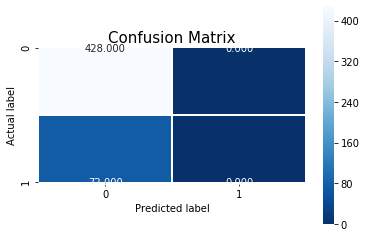

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_testfew,y_predSVC2)
acc = accuracy_score(y_testfew,y_predSVC2)
print('The Accuracy Score for this model is {acc}'.format(acc=acc))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title('Confusion Matrix', size = 15);

###Support Vector Machine with Two Feature Classification Report

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test2,y_predSVC2))

              precision    recall  f1-score   support

       False       0.86      1.00      0.92       428
        True       0.00      0.00      0.00        72

    accuracy                           0.86       500
   macro avg       0.43      0.50      0.46       500
weighted avg       0.73      0.86      0.79       500



/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
SVM_2 = [classifier.__class__,accuracy_score(y_test2,y_predSVC2),roc_auc_score(y_test2,y_predSVC2)]
results = results.append([SVM_2])

### Visualization of SVM Results on Training Set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


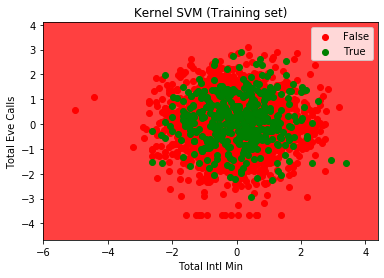

In [44]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train2, y_train2
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Total Intl Min')
plt.ylabel('Total Eve Calls')
plt.legend()
plt.show()

In [45]:
df_encode.columns

Index(['account length', 'area code', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls'],
      dtype='object')

### Visualization of SVM Results on Test Set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


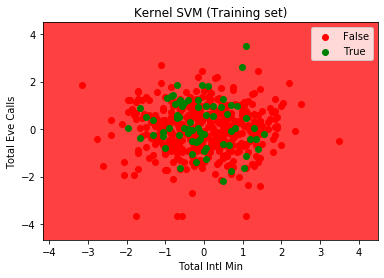

In [46]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test2, y_test2
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Total Intl Min')
plt.ylabel('Total Eve Calls')
plt.legend()
plt.show()

## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
logclassifer = LogisticRegression()
logclassifer.fit(X_train,y_train)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
y_predlog = logclassifer.predict(X_test)

The Accuracy Score for this model is 0.87


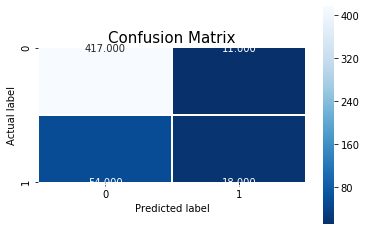

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_predlog)
acc = accuracy_score(y_test,y_predlog)
print('The Accuracy Score for this model is {acc}'.format(acc=acc))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title('Confusion Matrix', size = 15);


###Logistic Regression Classifiction Report


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predlog))

              precision    recall  f1-score   support

       False       0.89      0.97      0.93       428
        True       0.62      0.25      0.36        72

    accuracy                           0.87       500
   macro avg       0.75      0.61      0.64       500
weighted avg       0.85      0.87      0.85       500



In [51]:
logreg = [logclassifier.__class__,accuracy_score(y_test,y_predlog),roc_auc_score(y_test2,y_predSVC2)]
results = results.append([SVM_2])

NameError: name 'logclassifier' is not defined

###Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
estimator = LogisticRegression()
selector = RFE(estimator,1,step=1)
selector = selector.fit(X_train,y_train)
print(selector.ranking_)
logclassifer.coef_

In [ ]:
y_predlogfeat = selector.predict(X_test)

###Model Performance with Feature Elimanation

In [ ]:
y_predfeature = selector.predict(X_test)
cm = confusion_matrix(y_test,y_predlogfeat)
acc = accuracy_score(y_test,y_predlogfeat)
print('The Accuracy Score for this model is {acc}'.format(acc=acc))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {acc}'.format(acc = acc)
plt.title('Confusion Matrix', size = 15);

###Logistic Regression with Feature Elimination Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predfeature))

### Visualization of Logistic Regression with Feature Selection

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Recommendation